In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

***
$\mathbf{\text{Extracting the specnum_output file: }}$<br>
***

In [2]:
file=open('specnum_output.txt','r').readlines() #Reading in the relevant file
b=[]
for i in np.arange(len(file)): 
    b.append(file[i].split())                   #Dividing the rows into columns
o = pd.DataFrame(data=b)                        #Final output
print(o.head(4))
print(len(o))
sites=18432
print('\n Number of sites:', sites)

      0        1                       2                       3   \
0  Entry  Nevents                    Time             Temperature   
1      1        0  0.0000000000000000E+00  4.2300000000000000E+02   
2      2  1821857  1.0000000000000000E+00  4.2300000000000000E+02   
3      3  3727032  2.0000000000000000E+00  4.2300000000000000E+02   

                        4     5    6    7     8      9     10  
0                   Energy    O*  CO*  O2*    O2     CO   CO2  
1  -9.0771797999999962E+03  8154  144    0     0      0     0  
2  -8.9650390000001116E+03  7600  453    0  -284  -1431  1122  
3  -8.3963062000003465E+03  6996  501    0  -710  -2935  2578  
1327

 Number of sites: 18432


#### Adding column to calculate number of empty sites

In [3]:
n_c=(len(o.iloc[0,:])) #number of current columns
o[n_c]=" "           #Creating new empty column 
o.iloc[0,n_c]="*"    #Labelling the new empty column 

print(o.head(4))
st = 0 #Initializing empty site coverage vector
for i in range(len(o.iloc[1:,5])):
    st = (sites - float(o.iloc[i+1,5]) - float(o.iloc[i+1,6]) - float(o.iloc[i+1,7])) #Calculating no. of empty sites
    o.iloc[i+1,n_c] = st
    
print(o.head(4))

      0        1                       2                       3   \
0  Entry  Nevents                    Time             Temperature   
1      1        0  0.0000000000000000E+00  4.2300000000000000E+02   
2      2  1821857  1.0000000000000000E+00  4.2300000000000000E+02   
3      3  3727032  2.0000000000000000E+00  4.2300000000000000E+02   

                        4     5    6    7     8      9     10 11  
0                   Energy    O*  CO*  O2*    O2     CO   CO2  *  
1  -9.0771797999999962E+03  8154  144    0     0      0     0     
2  -8.9650390000001116E+03  7600  453    0  -284  -1431  1122     
3  -8.3963062000003465E+03  6996  501    0  -710  -2935  2578     
      0        1                       2                       3   \
0  Entry  Nevents                    Time             Temperature   
1      1        0  0.0000000000000000E+00  4.2300000000000000E+02   
2      2  1821857  1.0000000000000000E+00  4.2300000000000000E+02   
3      3  3727032  2.0000000000000000E+00  

***
$\mathbf{\text{Plotting transient coverage of various species: }}$<br>
***

<IPython.core.display.Javascript object>


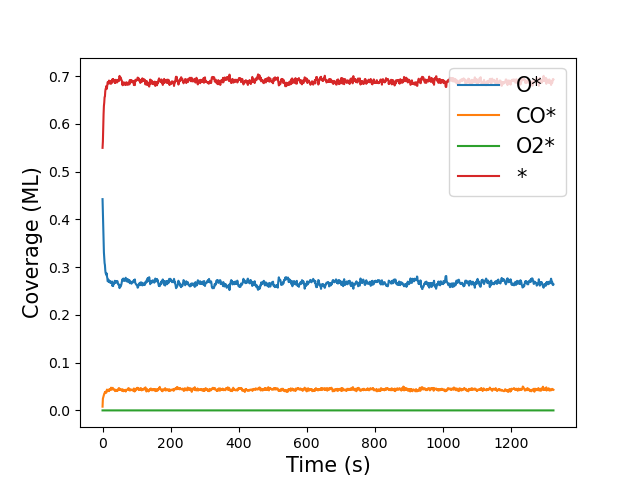

Text(0, 0.5, 'Coverage (ML)')

In [4]:
species = [5,6,7,11] # 5 = O* ; 6 = CO* ; 7 = O2* ; 8 = O2 ; 9 = CO ; 10 = CO2 ; 11 = *

#Plotting of effects of Time in seconds -> o[2]:
plt.figure(1)
for i in species:
    #Plotting Time = x ; Coverage of species i = y
    plt.plot(o[2][1:].astype(float),(o[i][1:].astype(float))/sites,label=o.iloc[0,i]) 
    a=0
plt.legend(fontsize=15, loc='best')
plt.xlabel((r'Time (s)'),size = '15.0')
plt.ylabel('Coverage (ML)',size = '15.0')
#plt.show()

### Filtering the data

<IPython.core.display.Javascript object>


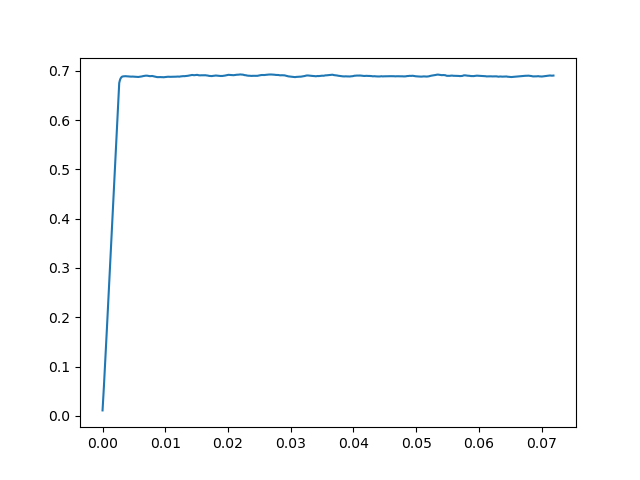

In [16]:
from scipy.signal import lfilter

n = 50  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
y = o[11][1:].astype(float)/sites
yy = lfilter(b,a,y)
x = o[2][1:].astype(float)/sites
plt.figure(2)
plt.plot(x,yy)
plt.show()

### -----From Liu

#### Plotting TOF CO2

<IPython.core.display.Javascript object>


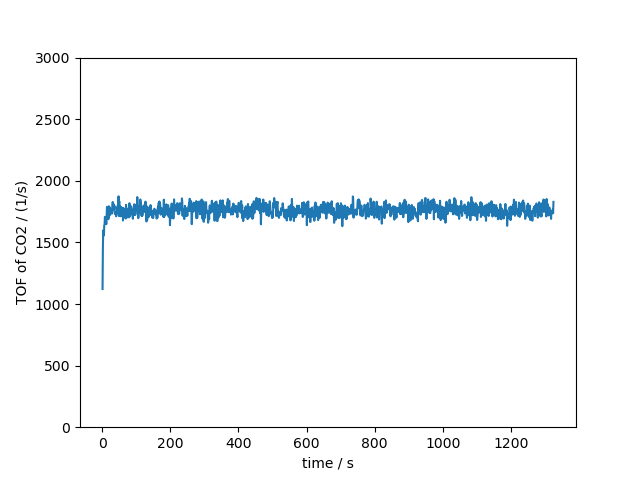

In [8]:
from matplotlib import pyplot
species = open('specnum_output.txt','r').readlines()
TOFofCO2=[]

for i in range(2,len(species)):
    ni = float(species[i].split()[-1])
    ni_1 = float(species[i-1].split()[-1])
    ti = float(species[i].split()[2])
    ti_1 = float(species[i-1].split()[2])
    TOFtransient = (ni-ni_1)/(ti-ti_1)
    TOFofCO2.append(TOFtransient)
    
time = []
for i in range(2,len(species)):
    ti = float(species[i].split()[2])
    time.append(ti)
pyplot.figure(3)
pyplot.xlabel('time / s')
pyplot.ylabel('TOF of CO2 / (1/s)')    
pyplot.plot(time,TOFofCO2)
pyplot.ylim(0,3000)
pyplot.show()